1130.0
The density of hydrophones is 311.6041645624078 hydrophones per km^3.
1250


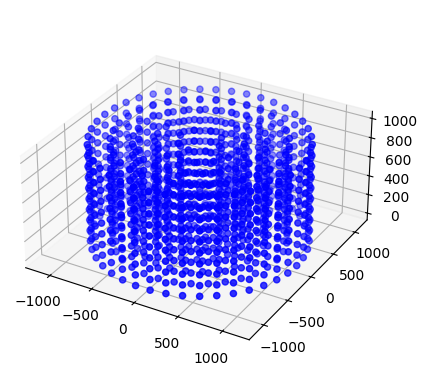

In [24]:
import math
import numpy as np

xrange = [-1130,1130]                                                                       # XLoc range in meters      
yrange = [-1130,1130]                                                                       # YLoc range in meters
zrange = [-500,500] 
D = 3
LocID = 4

Nz = 10 
Cluster_Size = 1
Z_Spacing = 10

# cylindrical shaped detector
if LocID ==4:
    # Define the distance between two hydrophones in z in a cluster
    Z_Inititally = np.linspace(zrange[0], zrange[1], Nz)
    Z_Layers = Z_Inititally[1] - Z_Inititally[0]

    # Define the number of circles in the detector
    number_of_circles = 5
    
    # Initialize the array containing the hydrophone locations wit the hydrophone at the origin
    Locs = np.zeros([1, 3])

    # Keep track of the number of hydrophones you have created
    N = 0 

    for k in range(Nz):
        for l in range(Cluster_Size):
            z = zrange[0] + k * Z_Layers + l * Z_Spacing

            for n in range(0, number_of_circles + 1):
                radius = ((yrange[1]) / number_of_circles) * n
                # Define the number of hydrophones in each layer
                num_hydrophones = 2 * np.pi * radius / (54 * np.pi)
                num_hydrophones_round = round(num_hydrophones)
                
                if num_hydrophones_round == 0:
                    num_hydrophones_round == 1

                for i in range(num_hydrophones_round):
                    angle = 2 * math.pi * i / num_hydrophones_round
                    x = radius * math.cos(angle)
                    y = radius * math.sin(angle)
                    
                    row = np.array([x, y, z]).reshape(1, -1)  
                    Locs = np.vstack((Locs, row))
                    N += 1

r = np.max(Locs[:,0])
print(r)
print(f"The density of hydrophones is {N / (np.pi * (r/1000)**2 * 2 * (zrange[1]/1000))} hydrophones per km^3.")
print(N)


Locs[:,2] = Locs[:,2] + 500

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plot all the Locs in a 3D graph

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Locs[:,0], Locs[:,1], Locs[:,2], color='blue')
ax.set_box_aspect([2,2,1])  # Set equal aspect ratio for all axes

plt.show()

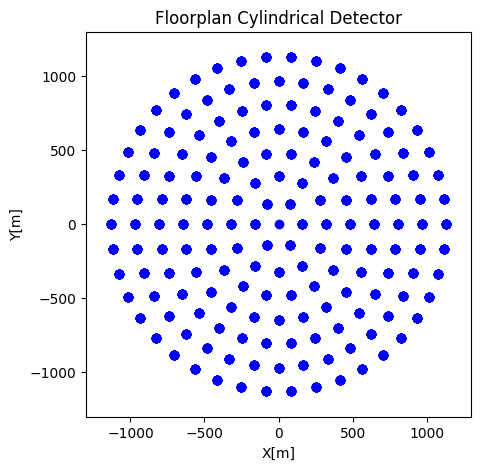

In [22]:
fig = plt.figure(figsize=(7,5))
plt.scatter(Locs[:,0], Locs[:,1],color='blue')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('X[m]')
plt.ylabel('Y[m]')
plt.xlim(-1300, 1300)
plt.ylim(-1300, 1300)
plt.title('Floorplan Cylindrical Detector')
plt.savefig('cylindrical detector.jpg')
plt.show()